## 1. Problem Definition

In [1]:
# Objective
# Predict whether a heart failure event (DEATH_EVENT) will occur for a given patient
# based on medical attributes such as age, blood pressure, ejection fraction, etc.
#
# Type of Problem
# Binary Classification: Target variable is 'DEATH_EVENT' (0 = no event, 1 = event)
#
# Importance
# Early identification of high-risk patients can help doctors intervene proactively,
# potentially saving lives and improving treatment outcomes.
#
# Evaluation Metrics
# -Accuracy: Overall correctness
# -Precision and Recall 
# -F1-score: Balance between precision and recall

# Task Question
# Can I accurately predict the risk of heart failure (DEATH_EVENT) using clinical
# and behavioral features through a Random Forest classification model?

# Import necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

# Set styles
plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")
np.random.seed(42)


## 2. Data Collection / Ingestion

In [2]:

df = pd.read_csv("/Users/klieeu777/2025 Spring/CDS403/capstone_ml/heart_failure/heart_failure.csv")
print(df.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

## 3. Data Preparation (Preprocessing & Cleaning)

In [3]:
# No missing values in this dataset, so I didn't use imputer.
# Target variable(DEATH_EVENT) is separated.

# Check basic information about the dataset
print("Dataset Info:")
df.info()

# Check for missing values in each column
print("\n Missing Values by Column:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB

 Mi

In [4]:
# Feature scaling using StandardScaler.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df.drop(columns=["DEATH_EVENT"])
y = df["DEATH_EVENT"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling (No imputation needed because there are no missing values in the dataset)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 4. Exploratory Data Analysis (EDA)

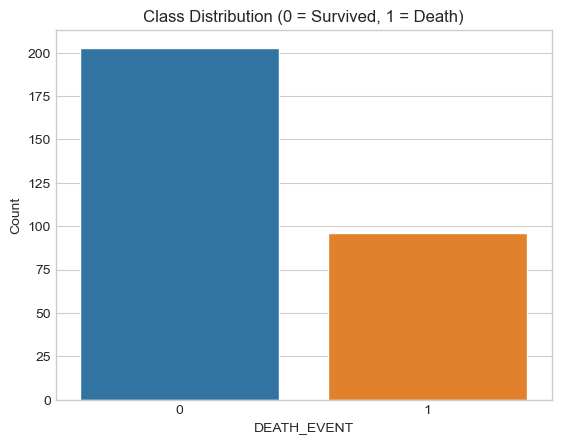

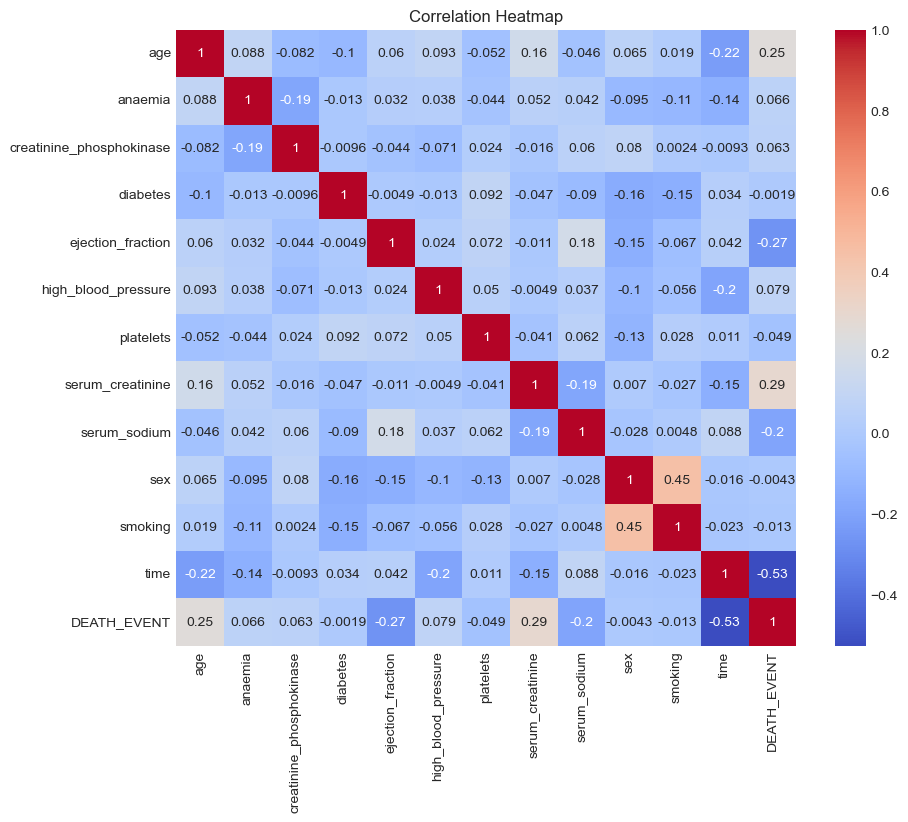

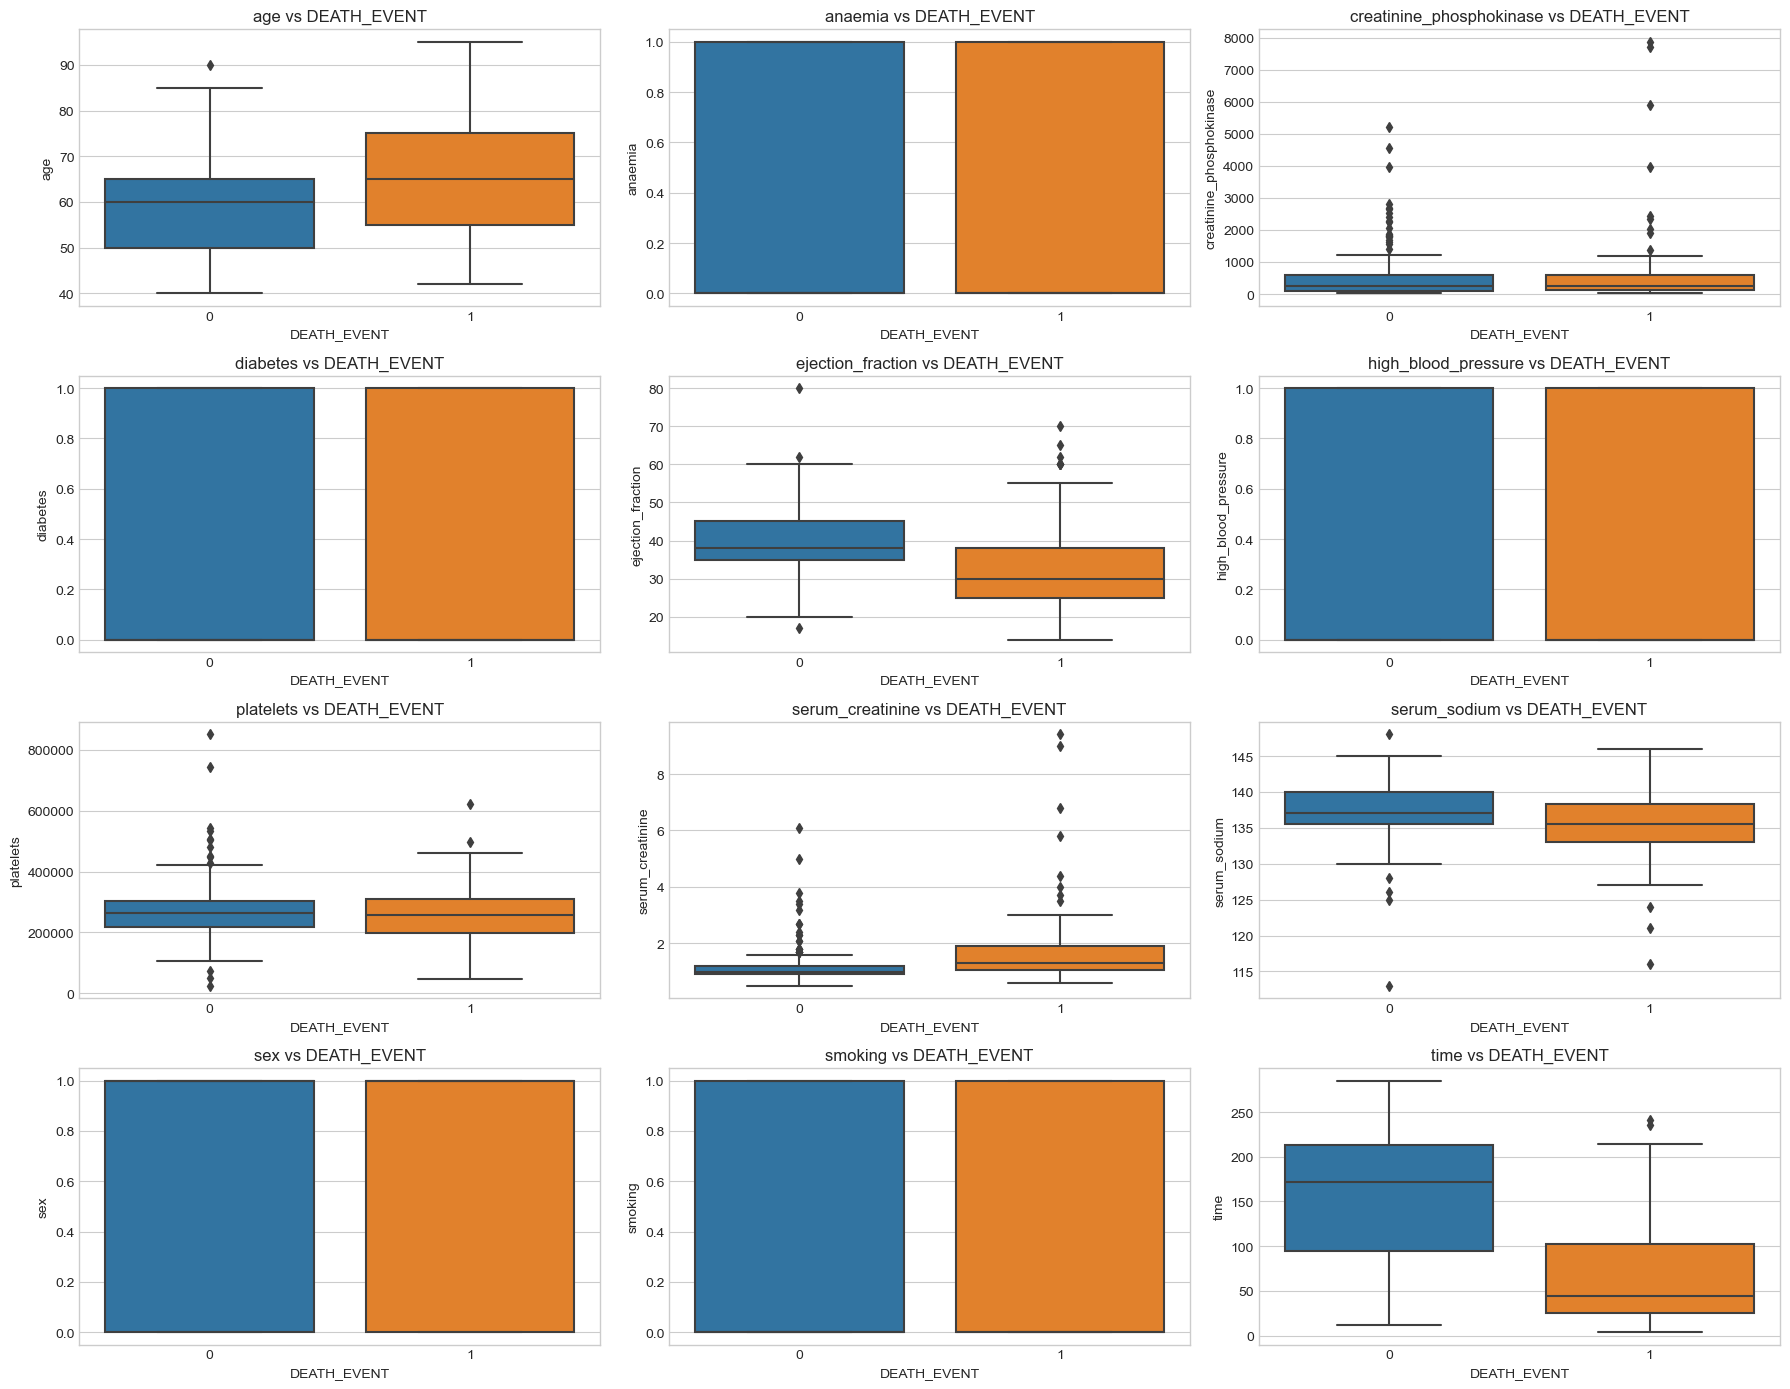

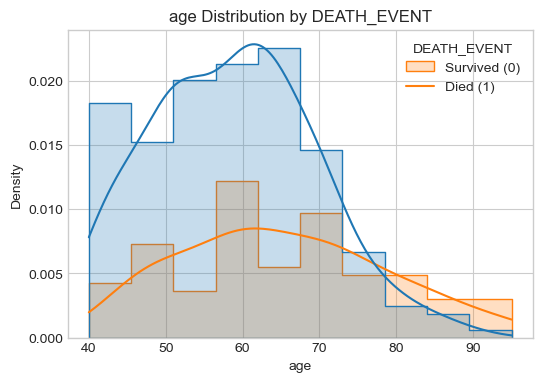

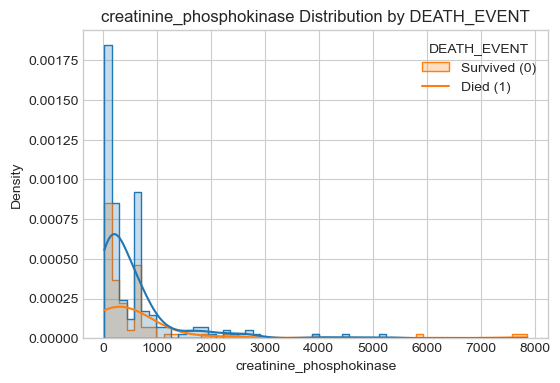

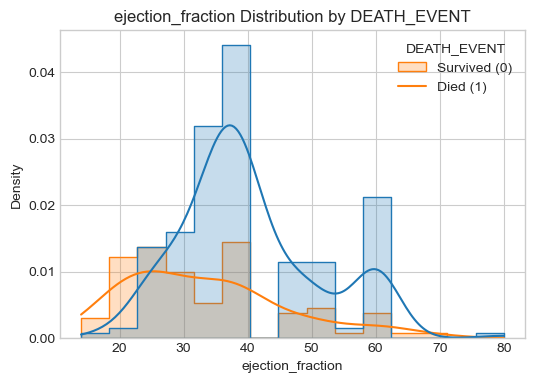

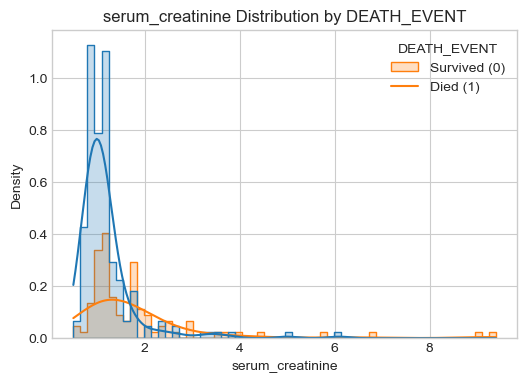

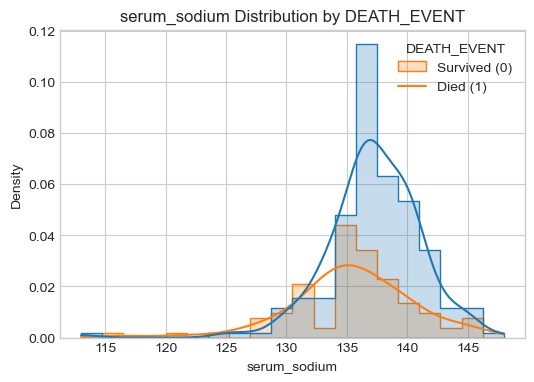

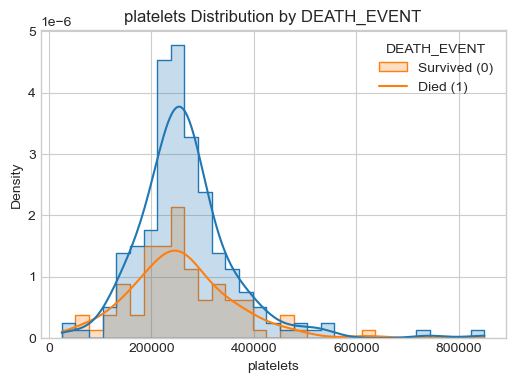

In [5]:
# To understand feature correlations and class distribution
# Class imbalance exists (more survivors than deaths) -- But this is normal in medical dataset.


# Class distribution of the target variable
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Class Distribution (0 = Survived, 1 = Death)')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Count')
plt.show()


# Correlation heatmap between features

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Box plots to detect outliers and visualize relationships with DEATH_EVENT
plt.figure(figsize=(18, 14))

# Use a 4x3 grid to handle more than 10 features
for i, column in enumerate(df.columns[:-1]):  # Exclude 'DEATH_EVENT'
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x='DEATH_EVENT', y=column, data=df)
    plt.title(f'{column} vs DEATH_EVENT')
    plt.xlabel('DEATH_EVENT')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


# Density plots of continuous features by DEATH_EVENT
# Select continuous features 
features = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
            'serum_creatinine', 'serum_sodium', 'platelets']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue='DEATH_EVENT', kde=True, element='step', stat='density')
    plt.title(f'{feature} Distribution by DEATH_EVENT')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='DEATH_EVENT', labels=['Survived (0)', 'Died (1)'])
    plt.show()


## 5. Feature Engineering & Selection

### Use all features (no need for additional engineering since dataset is clean and numeric)





## 6. Model Selection

-Chosen Algorithm: RandomForestClassifier

-Justification: This Algorithm ...

1. Handles high-dimensional, non-linear relationships well.

2. Will be used becasue of built-in feature importance.

3. Performs well with default settings.

## 7. Model Training

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Train the model using scaled training data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict on the scaled test set
y_pred = clf.predict(X_test_scaled)
print(y_pred)


[0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]


## 8. Model Evaluation

In [7]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Predict with the final model (if not done already)
# y_pred = best_model.predict(X_test)

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:")
print(report)
print("Accuracy:", round(accuracy, 2))
print("F1 Score:", round(f1, 2))



Confusion Matrix:
 [[33  2]
 [13 12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60

Accuracy: 0.75
F1 Score: 0.62


## 9. Hyperparameter Tuning

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline with scaling and classifier
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Define the hyperparameter grid
param_grid = {
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [3, 5, 10, None],
    'rf__min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV using 5-fold cross-validation and F1 score
grid_search = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the grid search on training data
grid_search.fit(X_train, y_train)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Print results
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validated F1 Score:", round(grid_search.best_score_, 4))

print("\nTuned Model Performance on Test Set:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_tuned), 4))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'rf__max_depth': 10, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
Best Cross-validated F1 Score: 0.818

Tuned Model Performance on Test Set:
Accuracy: 0.7333
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.91      0.80        35
           1       0.80      0.48      0.60        25

    accuracy                           0.73        60
   macro avg       0.76      0.70      0.70        60
weighted avg       0.75      0.73      0.72        60



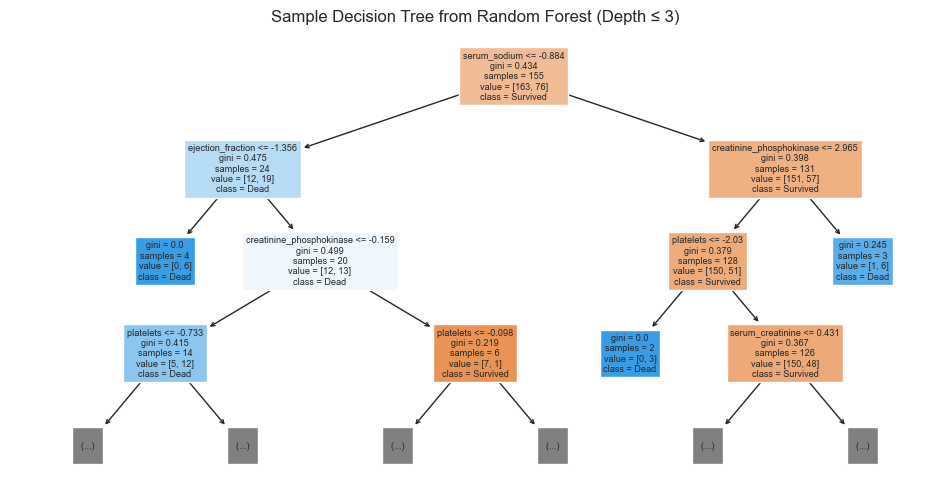

In [9]:
# Extract the trained RandomForest model from pipeline
best_rf = grid_search.best_estimator_.named_steps['rf']

# Visualize one decision tree from the forest
plt.figure(figsize=(12, 6))
tree.plot_tree(best_rf.estimators_[0],
               filled=True,
               feature_names=df.drop(columns=['DEATH_EVENT']).columns,
               class_names=["Survived", "Dead"],
               max_depth=3)
plt.title("Sample Decision Tree from Random Forest (Depth ≤ 3)")
plt.show()
